In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math
from numpy import linalg as LA

import seaborn as sns


In [2]:
from scipy import stats

Генерация выборки из повернутого нормального распределения

In [3]:

def generate_sample(n, angle, mu, l1,l2):
  cov = np.array([[l1,0],[0,l2]])
  angle_rad = angle * np.pi/180
  R = np.array([[np.cos(angle_rad), -np.sin(angle_rad)], [np.sin(angle_rad),np.cos((angle_rad))]])
  cov_rotated = np.matmul(np.matmul(R,cov), R.T)
  X = np.random.multivariate_normal(mu, cov_rotated, size = n)
  return X


Построение оценки

In [4]:
def estimate_angle(X):
  pca = PCA(n_components=2)
  pca.fit(X)
  max_eig = pca.components_[0]
  if (max_eig[1]<0):
    max_eig = - max_eig
  theta_hat = np.arccos(max_eig[0])
  return theta_hat



Подсчет итоговой величины

In [5]:
def total_value(n,l1,l2,angle,theta_hat):
  angle_rad = angle * np.pi/180
  M = np.sqrt(l1*l2/((n-1)*(l1-l2)**2))
  return (theta_hat - angle_rad)/M



In [6]:

mean = [0,0]

Для угла = 30

In [33]:
angle = 30

In [34]:
n=100

In [35]:
lambda_1 = 3
lambda_2 = 1

In [36]:
samples =[]
for i in range(5000):
  samples.append(generate_sample(n,angle,mean,lambda_1,lambda_2))

thetas =[]
for i in range(5000):
  thetas.append(estimate_angle(samples[i]))

total_samples = []
for i in range(5000):
  total_samples.append(total_value(n,lambda_1,lambda_2,angle,thetas[i]))

In [13]:
from scipy.stats import shapiro

In [14]:
shapiro(total_samples)

ShapiroResult(statistic=0.9996135830879211, pvalue=0.4520494043827057)

In [ ]:
stats.kstest(total_samples, stats.norm.cdf)

KstestResult(statistic=0.012949335179598953, pvalue=0.36835437178951524, statistic_location=1.3616722911171273, statistic_sign=-1)

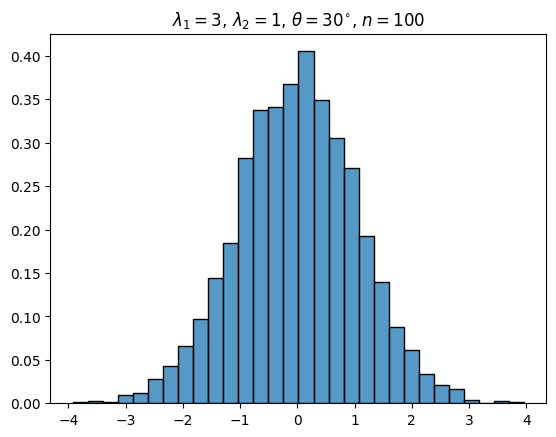

In [37]:
ax = sns.histplot(total_samples, stat = 'density', bins=30)
#ax.lines[0].set_color('crimson')
# Adding labels and title
#plt.xlabel('Значения')
#plt.ylabel('Частота')
#plt.text(1.5, 70, 'mean = '+ str(round(np.mean(total_samples),3)), fontsize = 15)
#plt.text(1.5, 40, 'var = '+ str(round(np.var(total_samples),3)), fontsize = 15)
#plt.text(1.5, 100, 'p-value = '+ str(round(stats.kstest(total_samples, stats.norm.cdf).pvalue,3)), fontsize = 15)
plt.title(r'$\lambda_1=3$, $\lambda_2=1$, $ \theta =30^{\circ}$, $n=100$')
plt.gca().set_ylabel('')

# Display the plot
plt.show()

In [38]:
n = 1000

In [39]:
samples =[]
for i in range(5000):
  samples.append(generate_sample(n,angle,mean,lambda_1,lambda_2))

thetas =[]
for i in range(5000):
  thetas.append(estimate_angle(samples[i]))

total_samples = []
for i in range(5000):
  total_samples.append(total_value(n,lambda_1,lambda_2,angle,thetas[i]))

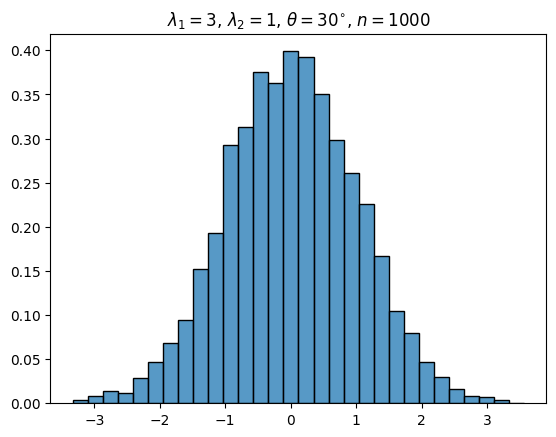

In [40]:
ax = sns.histplot(total_samples, stat = 'density', bins=30)
#ax.lines[0].set_color('crimson')
# Adding labels and title
#plt.xlabel('Значения')
#plt.ylabel('Частота')
#plt.text(1.5, 70, 'mean = '+ str(round(np.mean(total_samples),3)), fontsize = 15)
#plt.text(1.5, 40, 'var = '+ str(round(np.var(total_samples),3)), fontsize = 15)
#plt.text(1.5, 100, 'p-value = '+ str(round(stats.kstest(total_samples, stats.norm.cdf).pvalue,3)), fontsize = 15)
plt.title(r'$\lambda_1=3$, $\lambda_2=1$, $ \theta =30^{\circ}$, $n=1000$')
plt.gca().set_ylabel('')

# Display the plot
plt.show()

Для угла = 45

In [56]:
angle = 45
n=100
lambda_1 = 3
lambda_2 = 1

In [57]:
samples =[]
for i in range(5000):
  samples.append(generate_sample(n,angle,mean,lambda_1,lambda_2))

thetas =[]
for i in range(5000):
  thetas.append(estimate_angle(samples[i]))

total_samples = []
for i in range(5000):
  total_samples.append(total_value(n,lambda_1,lambda_2,angle,thetas[i]))

In [48]:
stats.kstest(total_samples, stats.norm.cdf)

KstestResult(statistic=0.01367405214353394, pvalue=0.3044256294673736, statistic_location=-1.6754197936369422, statistic_sign=1)

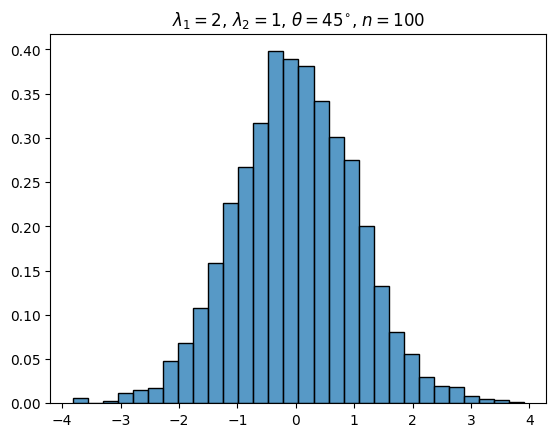

In [58]:
ax = sns.histplot(total_samples, stat = 'density', bins=30)
#ax.lines[0].set_color('crimson')
# Adding labels and title
#plt.xlabel('Значения')
#plt.ylabel('Частота')
#plt.text(1.5, 70, 'mean = '+ str(round(np.mean(total_samples),3)), fontsize = 15)
#plt.text(1.5, 40, 'var = '+ str(round(np.var(total_samples),3)), fontsize = 15)
#plt.text(1.5, 100, 'p-value = '+ str(round(stats.kstest(total_samples, stats.norm.cdf).pvalue,3)), fontsize = 15)
plt.title(r'$\lambda_1=2$, $\lambda_2=1$, $ \theta =45^{\circ}$, $n=100$')
plt.gca().set_ylabel('')

# Display the plot
plt.show()

In [59]:
n=1000

In [60]:
samples =[]
for i in range(5000):
  samples.append(generate_sample(n,angle,mean,lambda_1,lambda_2))

thetas =[]
for i in range(5000):
  thetas.append(estimate_angle(samples[i]))

total_samples = []
for i in range(5000):
  total_samples.append(total_value(n,lambda_1,lambda_2,angle,thetas[i]))

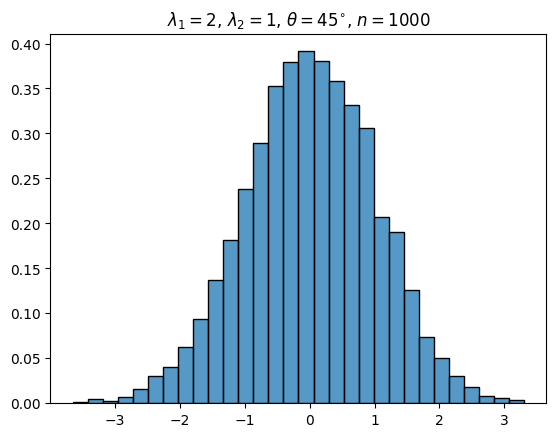

In [61]:
ax = sns.histplot(total_samples, stat = 'density', bins=30)
#ax.lines[0].set_color('crimson')
# Adding labels and title
#plt.xlabel('Значения')
#plt.ylabel('Частота')
#plt.text(1.5, 70, 'mean = '+ str(round(np.mean(total_samples),3)), fontsize = 15)
#plt.text(1.5, 40, 'var = '+ str(round(np.var(total_samples),3)), fontsize = 15)
#plt.text(1.5, 100, 'p-value = '+ str(round(stats.kstest(total_samples, stats.norm.cdf).pvalue,3)), fontsize = 15)
plt.title(r'$\lambda_1=2$, $\lambda_2=1$, $ \theta =45^{\circ}$, $n=1000$')
plt.gca().set_ylabel('')

# Display the plot
plt.show()

Для угла = 90

In [62]:
angle = 90
n = 100
lambda_1 = 3
lambda_2 = 1

In [63]:
samples =[]
for i in range(5000):
  samples.append(generate_sample(n,angle,mean,lambda_1,lambda_2))

thetas =[]
for i in range(5000):
  thetas.append(estimate_angle(samples[i]))

total_samples = []
for i in range(5000):
  total_samples.append(total_value(n,lambda_1,lambda_2,angle,thetas[i]))

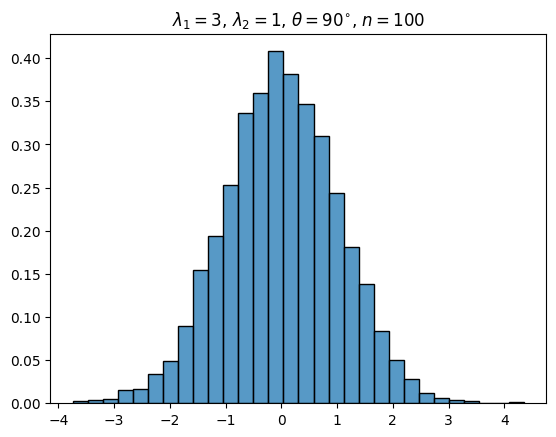

In [65]:
ax = sns.histplot(total_samples, stat = 'density', bins=30)
#ax.lines[0].set_color('crimson')
# Adding labels and title
#plt.xlabel('Значения')
#plt.ylabel('Частота')
#plt.text(1.5, 70, 'mean = '+ str(round(np.mean(total_samples),3)), fontsize = 15)
#plt.text(1.5, 40, 'var = '+ str(round(np.var(total_samples),3)), fontsize = 15)
#plt.text(1.5, 100, 'p-value = '+ str(round(stats.kstest(total_samples, stats.norm.cdf).pvalue,3)), fontsize = 15)
plt.title(r'$\lambda_1=3$, $\lambda_2=1$, $ \theta =90^{\circ}$, $n=100$')
plt.gca().set_ylabel('')

# Display the plot
plt.show()

In [66]:
n=1000

In [67]:
samples =[]
for i in range(5000):
  samples.append(generate_sample(n,angle,mean,lambda_1,lambda_2))

thetas =[]
for i in range(5000):
  thetas.append(estimate_angle(samples[i]))

total_samples = []
for i in range(5000):
  total_samples.append(total_value(n,lambda_1,lambda_2,angle,thetas[i]))

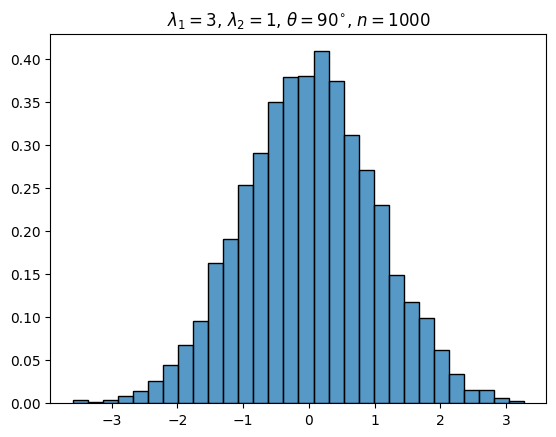

In [68]:
ax = sns.histplot(total_samples, stat = 'density', bins=30)
#ax.lines[0].set_color('crimson')
# Adding labels and title
#plt.xlabel('Значения')
#plt.ylabel('Частота')
#plt.text(1.5, 70, 'mean = '+ str(round(np.mean(total_samples),3)), fontsize = 15)
#plt.text(1.5, 40, 'var = '+ str(round(np.var(total_samples),3)), fontsize = 15)
#plt.text(1.5, 100, 'p-value = '+ str(round(stats.kstest(total_samples, stats.norm.cdf).pvalue,3)), fontsize = 15)
plt.title(r'$\lambda_1=3$, $\lambda_2=1$, $ \theta =90^{\circ}$, $n=1000$')
plt.gca().set_ylabel('')

# Display the plot
plt.show()

$\lambda_1 = 1.1, \lambda_2 = 1$

In [77]:
angle = 30
n = 1000
lambda_1 = 1.1
lambda_2 = 1

In [78]:
samples =[]
for i in range(5000):
  samples.append(generate_sample(n,angle,mean,lambda_1,lambda_2))

thetas =[]
for i in range(5000):
  thetas.append(estimate_angle(samples[i]))

total_samples = []
for i in range(5000):
  total_samples.append(total_value(n,lambda_1,lambda_2,angle,thetas[i]))

In [71]:
stats.kstest(total_samples, stats.norm.cdf)

KstestResult(statistic=0.310824867503445, pvalue=0.0, statistic_location=-0.4895537159285768, statistic_sign=-1)

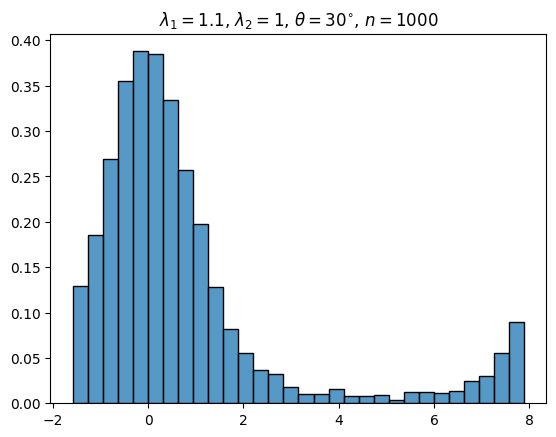

In [79]:
ax = sns.histplot(total_samples, stat = 'density', bins=30)
#ax.lines[0].set_color('crimson')
# Adding labels and title
#plt.xlabel('Значения')
#plt.ylabel('Частота')
#plt.text(1.5, 70, 'mean = '+ str(round(np.mean(total_samples),3)), fontsize = 15)
#plt.text(1.5, 40, 'var = '+ str(round(np.var(total_samples),3)), fontsize = 15)
#plt.text(1.5, 100, 'p-value = '+ str(round(stats.kstest(total_samples, stats.norm.cdf).pvalue,3)), fontsize = 15)
plt.title(r'$\lambda_1=1.1$, $\lambda_2=1$, $ \theta =30^{\circ}$, $n=1000$')
plt.gca().set_ylabel('')

# Display the plot
plt.show()

In [73]:
n = 10000

In [74]:
samples =[]
for i in range(5000):
  samples.append(generate_sample(n,angle,mean,lambda_1,lambda_2))

thetas =[]
for i in range(5000):
  thetas.append(estimate_angle(samples[i]))

total_samples = []
for i in range(5000):
  total_samples.append(total_value(n,lambda_1,lambda_2,angle,thetas[i]))

In [75]:
stats.kstest(total_samples, stats.norm.cdf)

KstestResult(statistic=0.014674165900966485, pvalue=0.2295868541370455, statistic_location=0.2920457189850934, statistic_sign=-1)

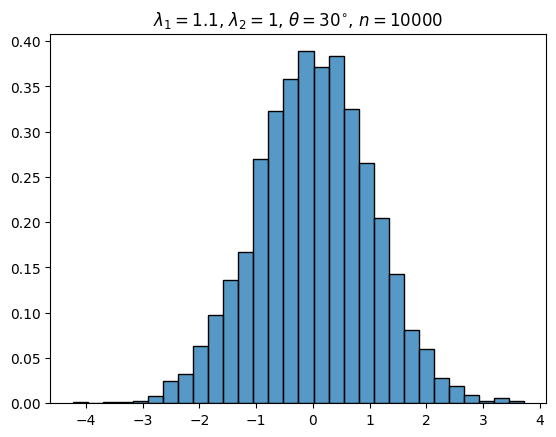

In [76]:
ax = sns.histplot(total_samples, stat = 'density', bins=30)
#ax.lines[0].set_color('crimson')
# Adding labels and title
#plt.xlabel('Значения')
#plt.ylabel('Частота')
#plt.text(1.5, 70, 'mean = '+ str(round(np.mean(total_samples),3)), fontsize = 15)
#plt.text(1.5, 40, 'var = '+ str(round(np.var(total_samples),3)), fontsize = 15)
#plt.text(1.5, 100, 'p-value = '+ str(round(stats.kstest(total_samples, stats.norm.cdf).pvalue,3)), fontsize = 15)
plt.title(r'$\lambda_1=1.1$, $\lambda_2=1$, $ \theta =30^{\circ}$, $n=10 000$')
plt.gca().set_ylabel('')

# Display the plot
plt.show()